# Image Classification: Multi Class

> **Disclaimer ⚠️:**
> - Demo ini sebatas referensi saja
> - Tidak boleh asal copy paste terutama pada bagian dengan tanda **[Additional ⚠️]** karna berpotensi terkena **PLAGIARISM**.

> Referensi Utama:
- https://www.dicoding.com/academies/185/tutorials/10099
- https://www.dicoding.com/academies/185/tutorials/10239
- https://www.dicoding.com/academies/185/tutorials/10109

> Referensi Tambahan:
  - https://github.com/reevald/craftivity-data/blob/main/tflite-model-maker.ipynb

## Kriteria Penilaian

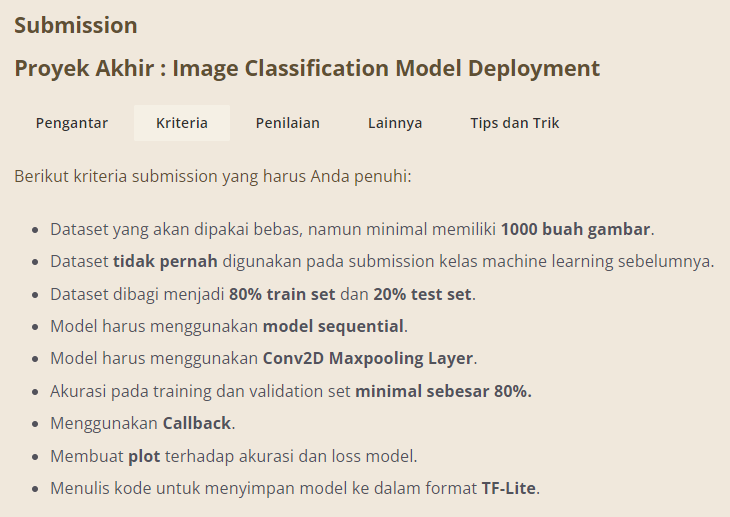
   
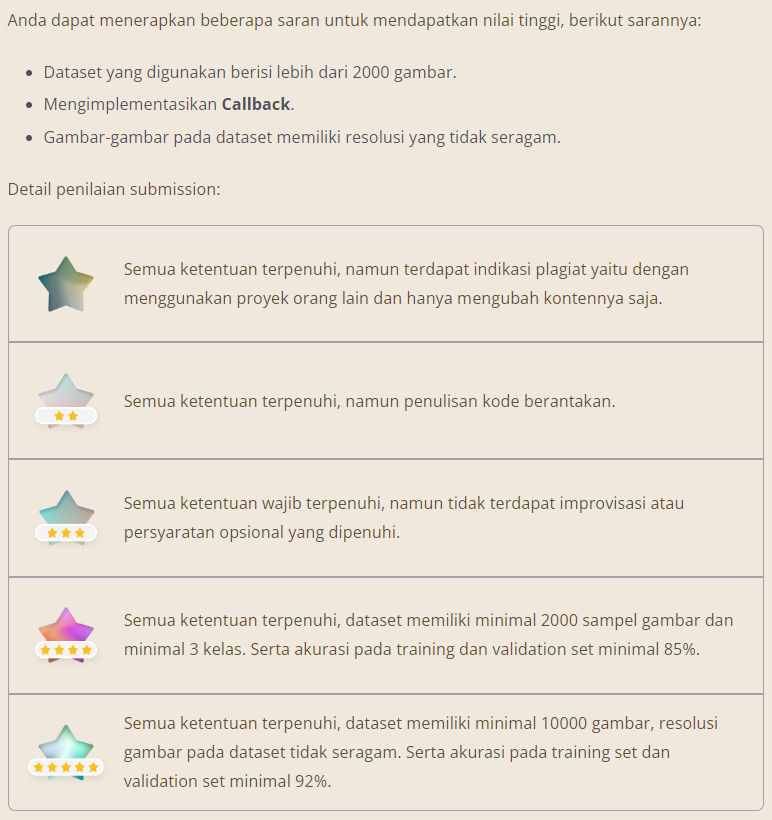

## Importing Required Libraries

In [16]:
# For processing data
import os
import zipfile
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('ggplot')

## Download Dataset

In [2]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2024-01-04 08:28:45--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2024-01-04 08:28:45--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   305MB/s   

## Load Data

In [3]:
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## Data Exploration

In [4]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Pawn', 'Bishop', 'Queen', 'Knight', 'King']

### Data Distribution each Class

In [5]:
for label in os.listdir('/tmp/Chessman-image-dataset/Chess'):
  print(f'Total {label} images :', len(os.listdir(f'/tmp/Chessman-image-dataset/Chess/{label}')))

Total Rook images : 102
Total Pawn images : 107
Total Bishop images : 87
Total Queen images : 78
Total Knight images : 106
Total King images : 76


### Data Visualization

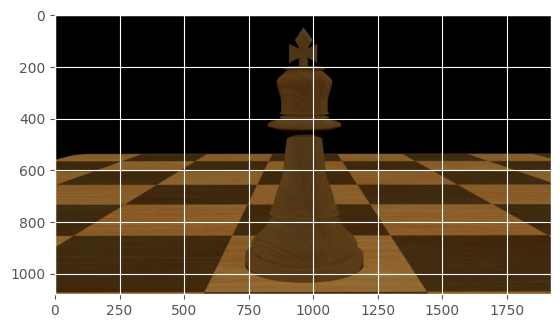

In [6]:
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

## Data Augmentation + Split

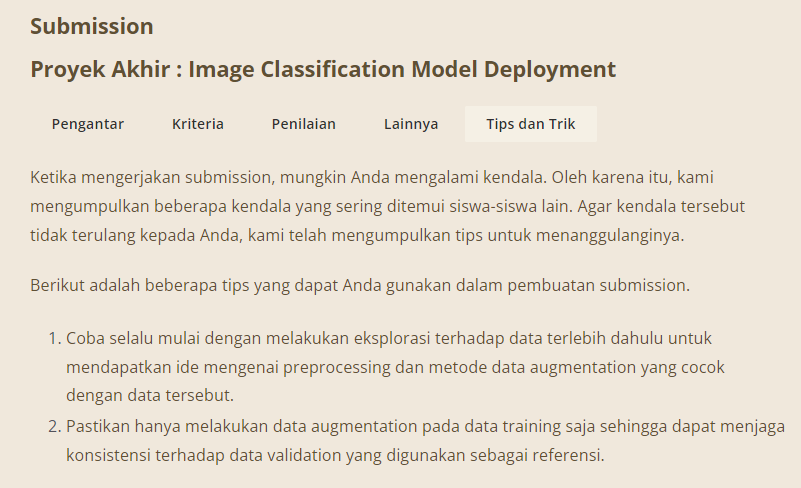

In [7]:
base_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')



train_datagen = ImageDataGenerator(rescale=1./255,
    # Tips untuk augmentasi, pertimbangkan gambar
    # apabila dirotasi, apakah akan merubah makna gambar
    # dan disesuaikan dengan kebutuhan ketika deployment
    # Contoh: jika kita dideploy di app, dan ketika memfoto boleh terbalik posisinya
    # maka data perlu diaugmentasi dengan flip vertical dan rotasi untuk menangani kasus tersebut
    # Contoh lain: Deteksi wajah, dimana posisi wajah harusnya tegak normal,
    # maka tidak perlu dilakukan rotasi yang terlalu besar begitupun flip (pilih horizontal jgn yang vertical)
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2 # 80% (train) : 20% (test)
) # set validation split

val_datagen = ImageDataGenerator(
    # Augmentasi pada validation cukup dilakukan rescaling nilai pixelnya saja
    # Sesuai saran dari Dicoding
    rescale=1./255,
    validation_split=0.2 # 80% (train) : 20% (test)
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = val_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


## Modelling

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

### **[Additional ⚠️]** Callback

In [10]:
callback_cp = tf.keras.callbacks.ModelCheckpoint(
    filepath="/tmp/best-weights/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5", #hdf5 = h5 (versi singkat)
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)
callback_es = tf.keras.callbacks.EarlyStopping(monitor='loss', restore_best_weights=True, patience=7)

In [11]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

## Training Model

In [12]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callback_cp, callback_es]
)

Epoch 1/30
56/56 [==============================] - ETA: 0s - loss: 1.8681 - accuracy: 0.1878
Epoch 1: val_accuracy improved from -inf to 0.15596, saving model to /tmp/best-weights/weights-improvement-01-0.16.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 [==============================] - 16s 179ms/step - loss: 1.8681 - accuracy: 0.1878 - val_loss: 1.7926 - val_accuracy: 0.1560
Epoch 2/30
56/56 [==============================] - ETA: 0s - loss: 1.7918 - accuracy: 0.1493
Epoch 2: val_accuracy improved from 0.15596 to 0.18349, saving model to /tmp/best-weights/weights-improvement-02-0.18.hdf5
56/56 [==============================] - 8s 151ms/step - loss: 1.7918 - accuracy: 0.1493 - val_loss: 1.7890 - val_accuracy: 0.1835
Epoch 3/30
56/56 [==============================] - ETA: 0s - loss: 1.7853 - accuracy: 0.1833
Epoch 3: val_accuracy did not improve from 0.18349
56/56 [==============================] - 7s 127ms/step - loss: 1.7853 - accuracy: 0.1833 - val_loss: 1.7854 - val_accuracy: 0.1835
Epoch 4/30
56/56 [==============================] - ETA: 0s - loss: 1.7787 - accuracy: 0.1923
Epoch 4: val_accuracy did not improve from 0.18349
56/56 [==============================] - 9s 156ms/step - loss: 1.7787 - accuracy: 0.1923 - val_loss

## Visualization: Accuracy and Loss

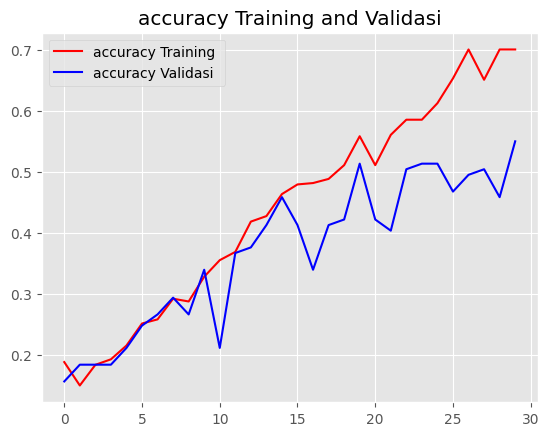

<Figure size 640x480 with 0 Axes>

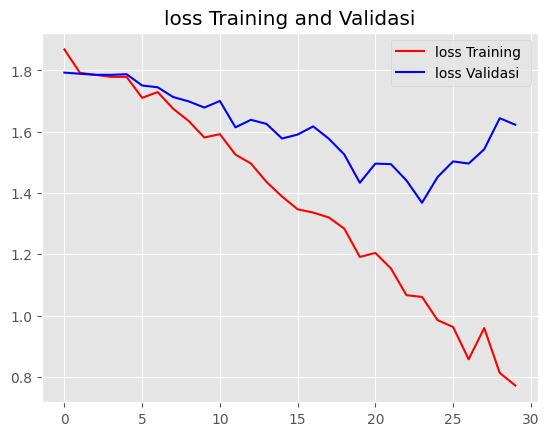

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='accuracy Training ')
plt.plot(epochs, val_acc, 'b', label='accuracy Validasi')
plt.title('accuracy Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='loss Training ')
plt.plot(epochs, val_loss, 'b', label='loss Validasi')
plt.title('loss Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

## **[Additional ✅]** Test Accuracy Model

In [15]:
val_loss_acc = model.evaluate(validation_generator, steps=len(validation_generator))

7/7 [==============================] - 3s 387ms/step - loss: 1.6226 - accuracy: 0.5505


## Export Model to TFLite

In [17]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('chess.tflite')
tflite_model_file.write_bytes(tflite_model)

38572856

In [20]:
tflite_model_size = len(tflite_model) / (1024 * 1024)
print('TFLite model size = %d MBs.' % tflite_model_size)

TFLite model size = 36 MBs.


## **[Additional ⚠️]** Optimization TFLite

### Quantization

References:
- https://www.tensorflow.org/lite/performance/model_optimization
- (old version): https://www.tensorflow.org/api_docs/python/tf/lite/Optimize
- (new version): https://www.tensorflow.org/lite/performance/post_training_quantization

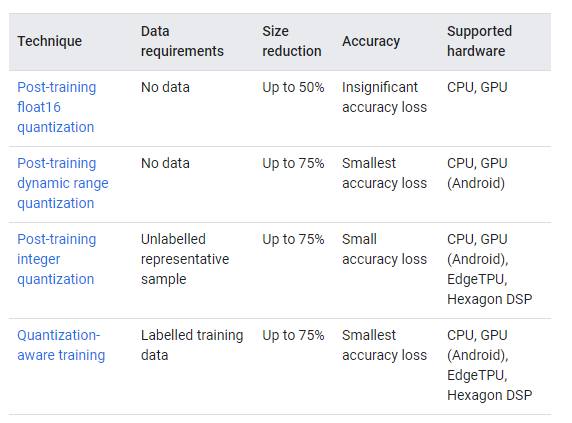
   
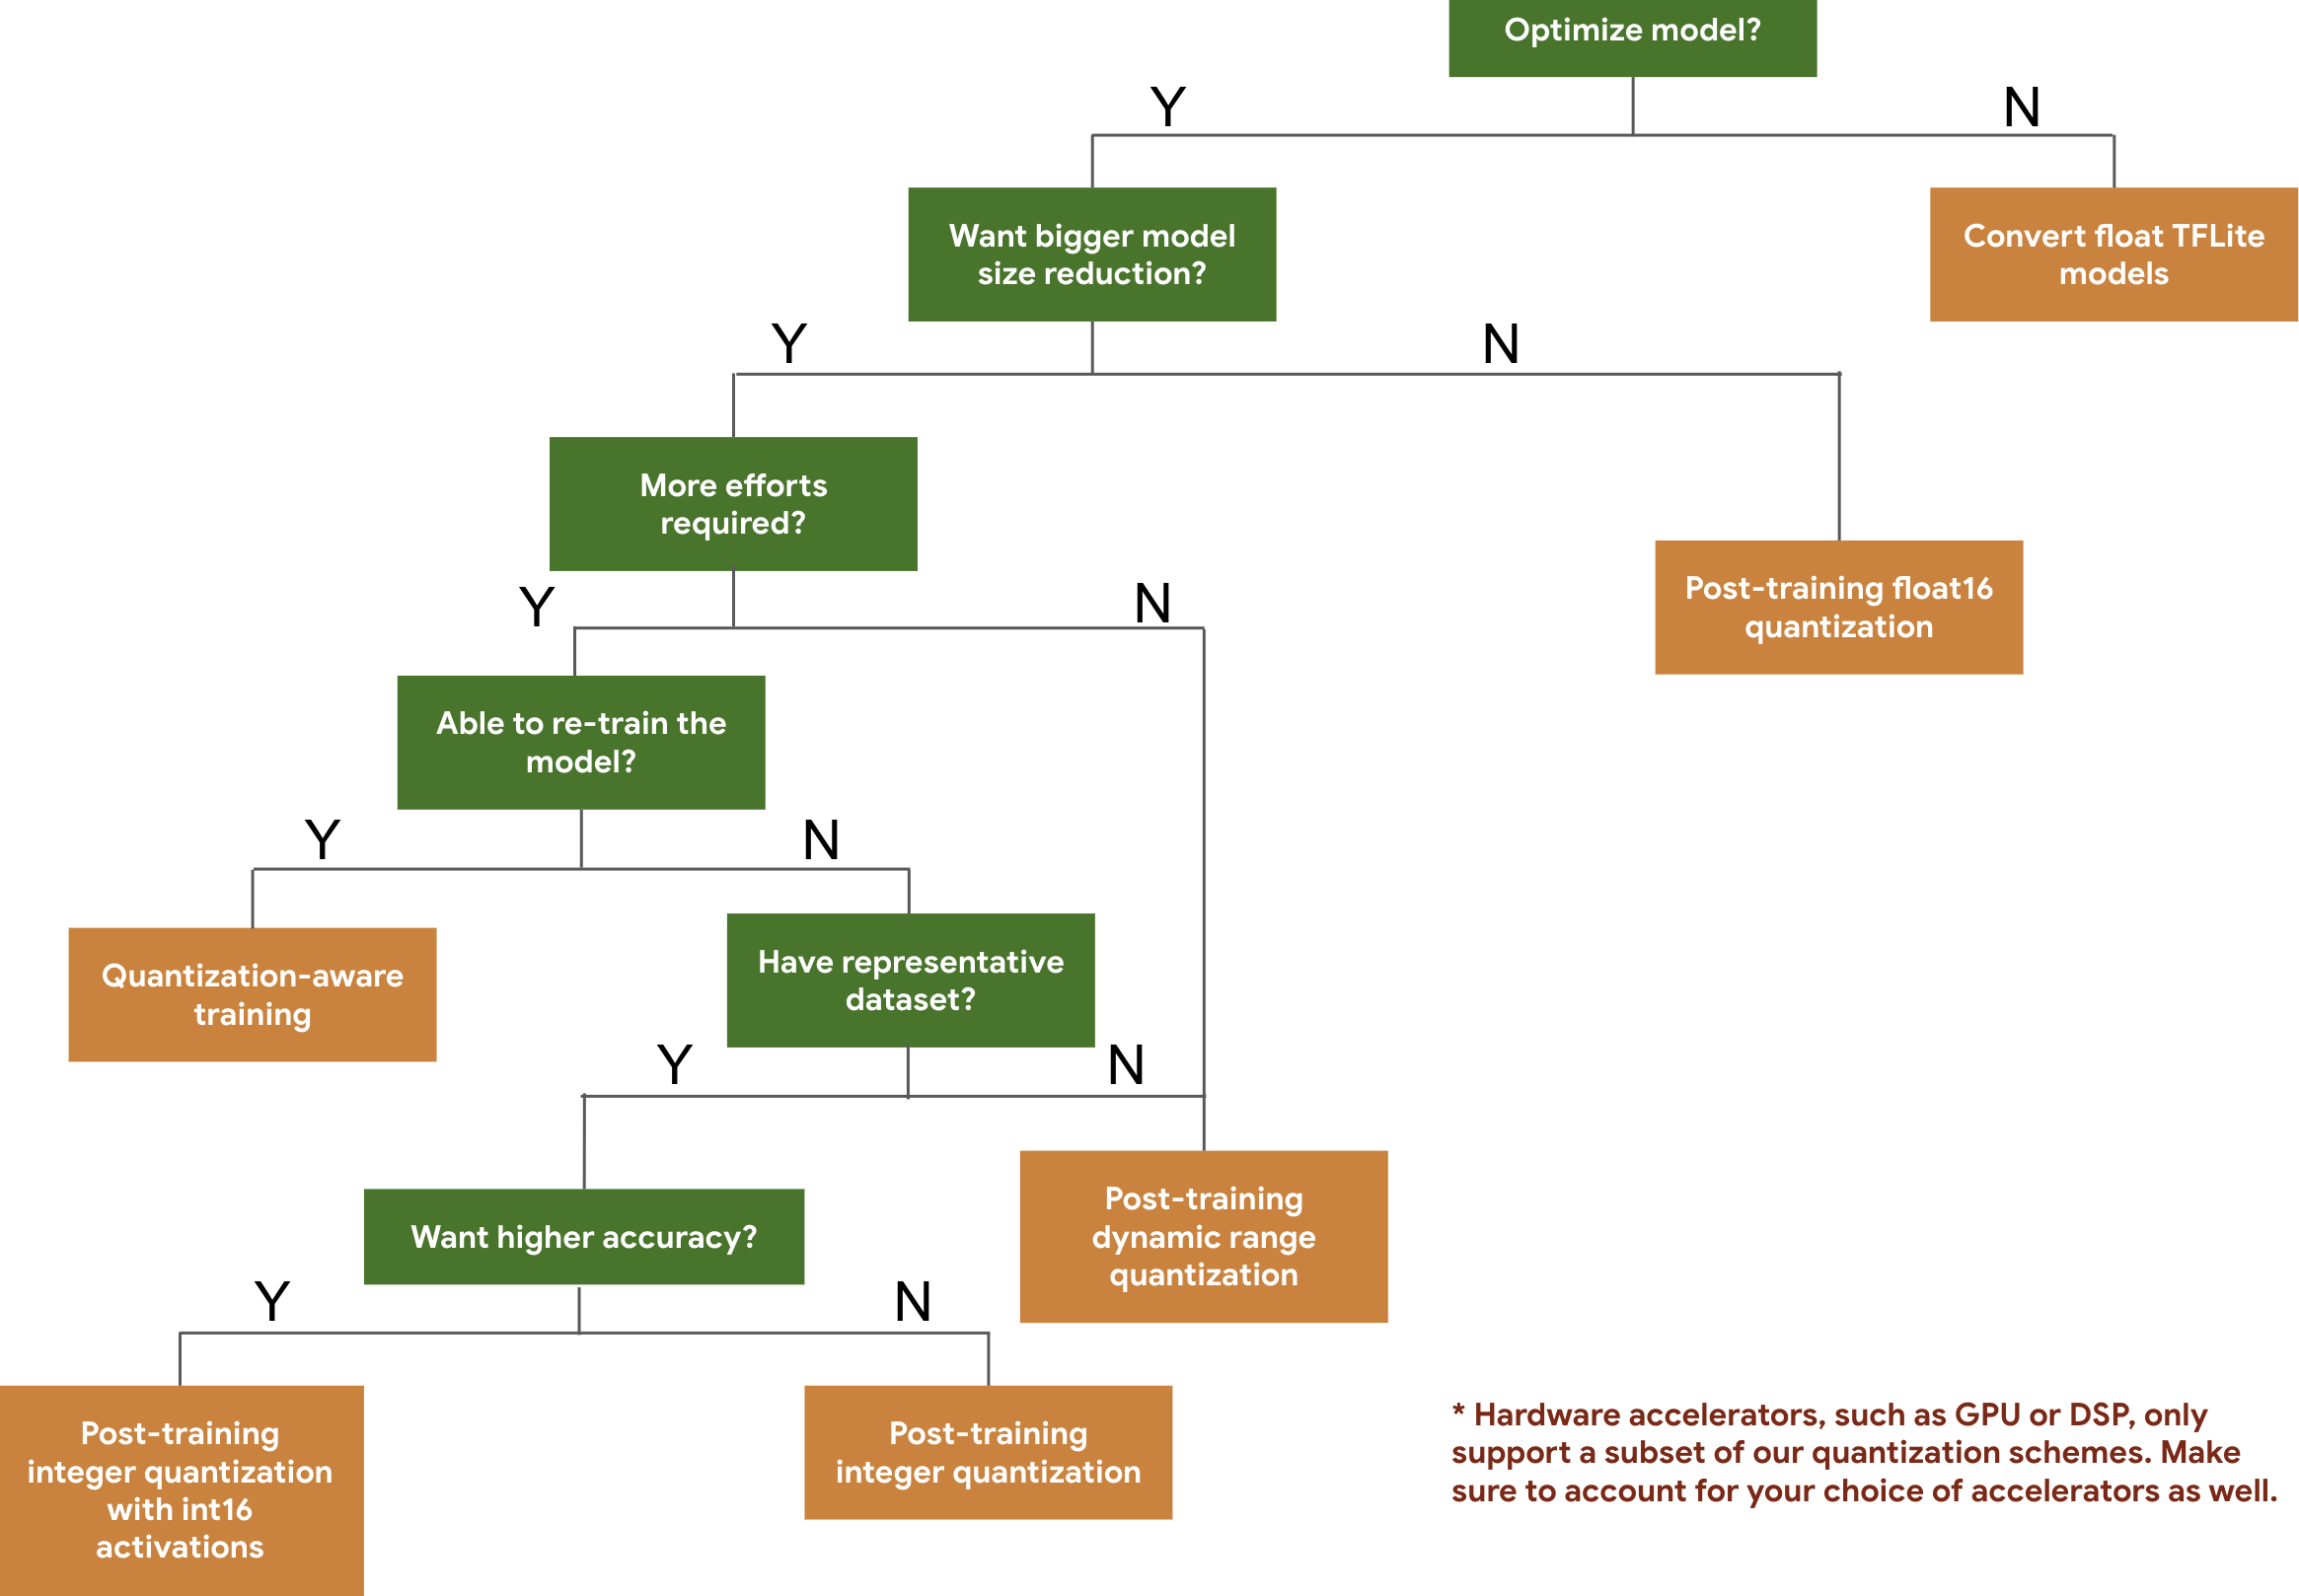

#### [Dynamic Range] Quantization default - decreased around 75%

In [23]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantdefault_model = converter.convert()

os.mkdir("/content/model-tflite-quantdefault")
f = open('/content/model-tflite-quantdefault/model.tflite', "wb")
f.write(tflite_quantdefault_model)
f.close()

In [25]:
size_tflite_quantdefault = len(tflite_quantdefault_model) / (1024 * 1024)
print('TFLite quant model size = %d MBs.' % size_tflite_quantdefault)
print(f"Decreased : {(tflite_model_size - size_tflite_quantdefault) / tflite_model_size * 100} %")

TFLite quant model size = 9 MBs.
Decreased : 74.97840450289706 %


## **[Additional ⚠️]** Test and Evaluate with TFLite Interpreter

In [27]:
import random
import numpy as np
# Take a sample batch file
idx_val = random.randrange(len(validation_generator))
list_test_img, list_test_lb = validation_generator[idx_val]

In [31]:
def evaluate_tflite_model(tflite_model):
  # Initialize TFLite interpreter using the model.
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # Run predictions on every image in the "test" dataset.
  predictions = []
  for test_image in list_test_img:

    # [FIXED] Input data type error, Previous error of type tf.float32, it should be tf.int8
    # Check if the input type is quantized, then rescale input data to uint8
    # ref : https://www.tensorflow.org/lite/performance/post_training_integer_quant
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    # Post-processing: remove batch dimension and find the digit with highest probability.
    predictions.append(output.argmax())

  # Compare prediction results with ground truth labels to calculate accuracy.
  accurate_count = 0
  for index in range(len(predictions)):
    if predictions[index] == np.argmax(list_test_lb[index]):
      accurate_count += 1
  accuracy = accurate_count * 1.0 / len(predictions)

  return accuracy

In [32]:
# Evaluate the TF Lite float model.
float_accuracy = evaluate_tflite_model(tflite_model)
print('Float model accuracy = %.4f' % float_accuracy)

# Evalualte the TF Lite quantized model.
quantized_accuracy = evaluate_tflite_model(tflite_quantdefault_model)
print('Quantized model accuracy = %.4f' % quantized_accuracy)
gap_acc = float_accuracy - quantized_accuracy
if gap_acc >= 0:
  print('Accuracy drop = %.4f' % (gap_acc))
else:
  print('Accuracy increase = %.4f' % (-1*gap_acc))

Float model accuracy = 0.6875
Quantized model accuracy = 0.6875
Accuracy drop = 0.0000


## Feel free untuk tanya / diskusi melalui grup atau japri fasil (Kak Galang) via WA ya 🙌